# Check max flow = 454.54526   (Monkaa = 23540.129)

In [2]:
import os
from ptlflow.utils.flow_utils import flow_read, flow_to_rgb
from ptlflow.utils.external.flowpy import replace_nans
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


/opt/conda/envs/b2f/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[!!alt_cuda_corr is not compiled!!]


# Flow distribution

# Gopro

 61%|███████████████████████▊               | 2574/4206 [01:12<00:46, 35.21it/s]

002570


100%|███████████████████████████████████████| 4206/4206 [01:58<00:00, 35.54it/s]


210.29102


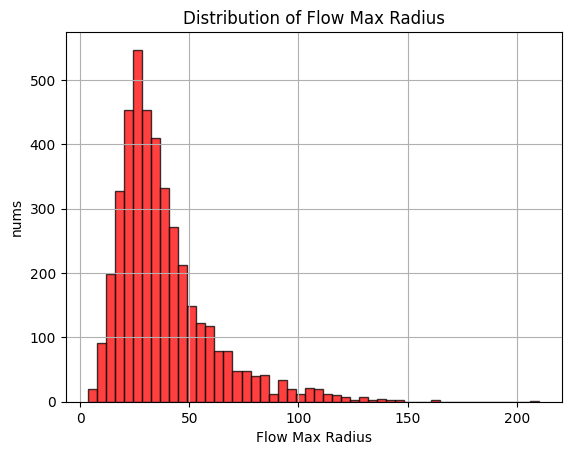

In [3]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/data/Gopro_my/train'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    # if flow_max_radius > 200:
    #     print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


  0%|                                                 | 0/15043 [00:00<?, ?it/s]

100%|█████████████████████████████████████| 15043/15043 [05:36<00:00, 44.69it/s]


23540.129


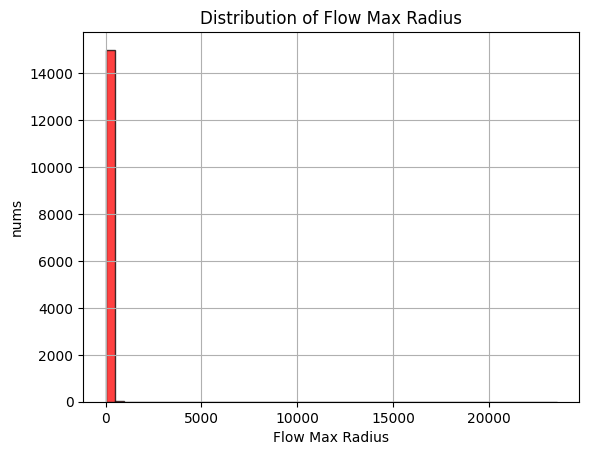

In [10]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/data/Monkaa_my/train'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder[:-3], ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.pfm')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    # if flow_max_radius > 200:
    #     print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


In [14]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Assuming flow_read and replace_nans are defined functions
# from your existing codebase, e.g.,
# from your_module import flow_read, replace_nans

data_path = '/workspace/Marigold/dataset/train/train_B.txt'
data_folder = []
with open (data_path, 'r') as f:
    for lin in f:
        data_folder.append(lin.strip())


master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder[:-3], ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.pfm')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    flow_max_radius_list.append(flow_max_radius)
    if flow_max_radius > master_max:
        master_max = flow_max_radius
    # if flow_max_radius > 200:
    #     print(scene)


print(master_max)

# Plotting the histogram of flow_max_radius
plt.hist(flow_max_radius_list, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Distribution of Flow Max Radius')
plt.xlabel('Flow Max Radius')
plt.ylabel('nums')
plt.grid(True)
plt.show()


  0%|                                                 | 0/38823 [00:00<?, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/data/Gopro_my/flows/train/000001/0.png.pfm'

In [15]:
data_path

'/workspace/Marigold/dataset/train/train_B.txt'

In [29]:
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

data_path = '/workspace/data/Gopro_my/test'
data_folder = os.listdir(data_path)
data_folder.sort()
master_max = 0
flow_max_radius_list = []

for scene in tqdm(data_folder, ncols=80):
    flow_path = os.path.join(data_path, scene, 'flow/flows', f'{scene}.flo')
    flow = flow_read(flow_path)
    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)

    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    max_magnitude = np.max(magnitude)

    print(flow_max_radius, max_magnitude)
    break







  0%|                                                  | 0/2222 [00:00<?, ?it/s]

29.007277 29.007277


# Gopro

In [3]:
import os,glob
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

030801


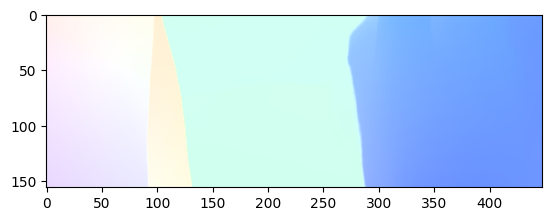

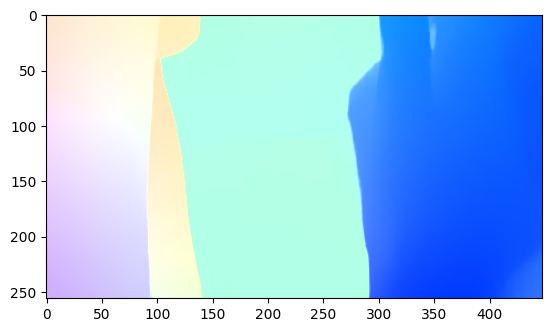

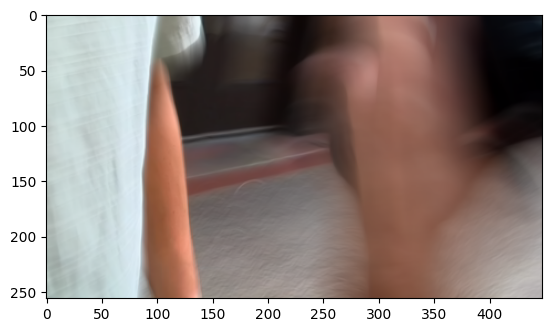

90.145454
(448, 256)


In [4]:
gopro_path = '/workspace/data/vimeo/train'
gopro_folder = os.listdir(gopro_path)
gopro_folder.sort()

for scene in gopro_folder[30800:]:
    print(scene)
    flow_path = os.path.join(gopro_path,scene,'flow/flows',f'{scene}.flo')
    flow = flow_read(flow_path)
    flow_rgb = flow_to_rgb(flow,flow_max_radius=150)
    flow_rgb = flow_rgb[50:-50,:,:]
    flow_rgb_2 = flow_to_rgb(flow)

    tt = Image.fromarray(flow_rgb)

    blur_img = os.path.join(gopro_path,scene,'blur',f'{scene}.png')
    blur = Image.open(blur_img)
    blur = np.array(blur)
    # blur = blur[50:-50,:,:]
    blur = Image.fromarray(blur)
    # blur=blur.resize((786,768))
    # flow_rgb = cv2.resize(flow_rgb, (768,768))
    plt.imshow(flow_rgb)
    plt.show()
    plt.imshow(flow_rgb_2)
    plt.show()
    plt.imshow(blur)
    plt.show()

    complex_flow = flow[..., 0] + 1j * flow[..., 1]
    complex_flow, nan_mask = replace_nans(complex_flow)
    radius, angle = np.abs(complex_flow), np.angle(complex_flow)
    flow_max_radius = np.max(radius)
    print(flow_max_radius)
    print(blur.size)
    break

In [6]:
def augment_flow(flow, command):

    if command == 'hflip':  # horizontal
        cv2.flip(flow, 1, flow)
        flow[:, :, 0] *= -1

    elif command ==  'vflip':  # vertical
        cv2.flip(flow, 0, flow)
        flow[:, :, 1] *= -1

    elif command ==  'rot90':
        flow = flow.transpose(1, 0, 2)
        flow = flow[:, :, [1, 0]]

    else:
        assert 'Wrong command!'

    return flow

def normalize_flow_to_tensor(flow):

    # Calculate the magnitude of the flow vectors
    u, v = flow[:,:,0], flow[:,:,1]
    magnitude = np.sqrt(u**2 + v**2)
    
    # Avoid division by zero by setting small magnitudes to a minimal positive value
    magnitude[magnitude == 0] = 1e-8
    
    # Normalize u and v components to get unit vectors for x and y
    x = u / magnitude
    y = v / magnitude

    # Set M to the largest blur magnitude in the set (maximum of the magnitude array)
    M = magnitude.max()
    
    # Normalize the magnitude to [0, 1] range for the z component
    z = magnitude / 147
    z = np.clip(z, 0, 1) 


    # Stack x, y, and z to create the 3D tensor C with shape (H, W, 3)
    C = np.stack((x, y, z), axis=-1)

    return C

flow_path = '/workspace/data/vimeo/train/000040/flow/flows/000040.flo'
flow = flow_read(flow_path)

print(flow)

flow = normalize_flow_to_tensor(flow)
print(flow)

[[[-16.653488   13.064911 ]
  [-16.691248   13.06747  ]
  [-16.710407   13.0653515]
  ...
  [-14.078087   14.933417 ]
  [-14.055248   14.898018 ]
  [-14.025068   14.859062 ]]

 [[-16.67542    13.06362  ]
  [-16.6969     13.063274 ]
  [-16.708803   13.060073 ]
  ...
  [-14.081822   14.933162 ]
  [-14.067961   14.910256 ]
  [-14.045513   14.877713 ]]

 [[-16.672144   13.055647 ]
  [-16.686125   13.055741 ]
  [-16.696539   13.052603 ]
  ...
  [-14.089752   14.935747 ]
  [-14.080283   14.9203   ]
  [-14.061773   14.891136 ]]

 ...

 [[-14.959256   17.207111 ]
  [-14.970272   17.206404 ]
  [-14.982302   17.200203 ]
  ...
  [-14.4755535  15.557172 ]
  [-14.483384   15.557947 ]
  [-14.481682   15.556778 ]]

 [[-14.954792   17.209072 ]
  [-14.965525   17.21003  ]
  [-14.978519   17.203394 ]
  ...
  [-14.472153   15.556874 ]
  [-14.480085   15.5548   ]
  [-14.481714   15.552401 ]]

 [[-14.952586   17.20717  ]
  [-14.962533   17.209026 ]
  [-14.976094   17.203259 ]
  ...
  [-14.459951   15.56183

In [7]:
print(flow.shape)

(256, 448, 3)


In [11]:
print(np.max(flow[:,:,0]))
print(np.min(flow[:,:,0]))

print(np.max(flow[:,:,1]))
print(np.min(flow[:,:,1]))

print(np.max(flow[:,:,2]))
print(np.min(flow[:,:,2]))

0.3073545
-0.9396733
0.99999976
0.3420734
0.24872354
0.046399385
